# MLP - Multilayer Perceptron
* Visualização: https://playground.tensorflow.org/

## Problema de Classificação
* **Identificar se um determinado cliente compra ou não um produto**  
* **SUV - Checar essa informação.**  

## Carregando os Dados

In [1]:
import pandas as pd

dataset = pd.read_csv("https://raw.githubusercontent.com/ect-info/ml/master/dados/Social_Network_Ads.csv")
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [2]:
dataset.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


## Escolhendo atributos
* Idade e Salário

- No X colocamos os elementos de entrada

- O Y é a saída, se é classe 0 ou classe 1, ou seja, se ele compra ou não compra um produto

In [3]:
X = dataset.loc[:,['Age','EstimatedSalary']].values
# ou
# X = dataset.iloc[:,2:4].values

y = dataset['Purchased'].values

print(X[0:6,:])

[[   19 19000]
 [   35 20000]
 [   26 43000]
 [   27 57000]
 [   19 76000]
 [   27 58000]]


## Separando entre conjuntos de treinamento e teste

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

## Normalização
* A amplitude de variação dos dados nos atributos idade e salário são bem diferentes
* Permite que a faixa de variação seja equilibrada entre os diferentes atributos
* Muitos algoritmos de aprendizado de máquinas são sensíveis a atribuitos com aplitude de valores muito distintos
* Vídeo com explicações: https://youtu.be/kIeXOC-Rnb4

In [5]:
# Fonte: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
X_train = sc.fit_transform(X_train)

X_test = sc.transform(X_test)

## Treinamento

In [6]:
import tensorflow as tf

### Construíndo a estrutra da rede
* Arquitetura

In [7]:
# Inicialização
classifier = tf.keras.models.Sequential()

# Adicionando a camada de entrada e a primeira camada escondida
classifier.add( tf.keras.layers.Dense( activation = 'relu', input_dim = 2, units = 4, kernel_initializer = 'uniform'))

# Adicionando a camada de saída
classifier.add( tf.keras.layers.Dense( activation = 'sigmoid', units = 1, kernel_initializer = 'uniform'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
# Montando a Rede
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

### Executando o treinamento

In [9]:
classifier.fit(X_train, y_train, batch_size = 1, epochs = 81)

Epoch 1/81
300/300 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5630 - loss: 0.6910
Epoch 2/81
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6579 - loss: 0.6797
Epoch 3/81
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6374 - loss: 0.6730
Epoch 4/81
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6236 - loss: 0.6654
Epoch 5/81
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6348 - loss: 0.6552
Epoch 6/81
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6350 - loss: 0.6487
Epoch 7/81
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6971 - loss: 0.6387
Epoch 8/81
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7432 - loss: 0.6252
Epoch 9/81
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7135 - loss: 0.6232
Epoch 10/81
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7780 - loss: 0.6028
Epoch 11/81
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7254 - loss: 0.6054
Epoch 12/81
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

## Avaliando do Modelo

In [10]:
y_pred = classifier.predict(X_test)

print(y_test[0:35])
print(y_pred[0:35])

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
[0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 0]
[[0.13794485]
 [0.19212109]
 [0.21994998]
 [0.11286715]
 [0.1210444 ]
 [0.06839152]
 [0.06839152]
 [0.7097166 ]
 [0.06839152]
 [0.50048316]
 [0.06839152]
 [0.06839152]
 [0.18617482]
 [0.38219532]
 [0.06839152]
 [0.35244077]
 [0.3006017 ]
 [0.06839152]
 [0.9811561 ]
 [0.06839152]
 [0.11218925]
 [0.9477016 ]
 [0.29706147]
 [0.85559165]
 [0.06839152]
 [0.9598931 ]
 [0.10005095]
 [0.09839246]
 [0.2185039 ]
 [0.18288293]
 [0.06839152]
 [0.31279063]
 [0.9097185 ]
 [0.17764439]
 [0.06839152]]


In [11]:
y_pred_bin = [ ( 1 if elem > 0.5 else 0) for elem in y_pred ]

In [12]:
import numpy as np

y_pred_bin =  np.array(y_pred_bin)

In [13]:
print(y_test[0:35])
print(y_pred_bin[0:35])

[0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 0]
[0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 0]


In [14]:
from sklearn.metrics import accuracy_score

print("Acurácia: ", accuracy_score(y_test,y_pred_bin)*100, "%"  )

Acurácia:  89.0 %


In [15]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_bin)
print("Matrix de confusão: ")
print(cm)


Matrix de confusão: 
[[65  3]
 [ 8 24]]


## Visualizando os resultados



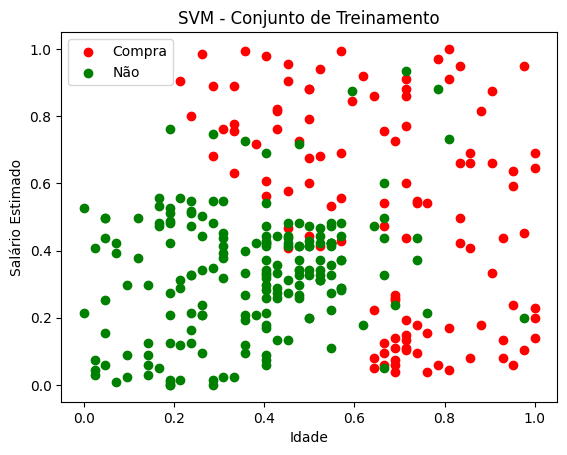

In [16]:
import matplotlib.pyplot as plt

# Seleção dos elementos classificados como negativos (não compra)
age_neg = X_train[y_train == 0, 0]
salary_neg = X_train[y_train == 0, 1]
age_pos = X_train[y_train == 1, 0]
salary_pos = X_train[y_train == 1, 1]

plt.scatter(age_pos,salary_pos, color='red', label = 'Compra')
plt.scatter(age_neg,salary_neg, color='green', label = 'Não')

plt.title('SVM - Conjunto de Treinamento')
plt.xlabel('Idade')
plt.ylabel('Salário Estimado')
plt.legend()
plt.show()

76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


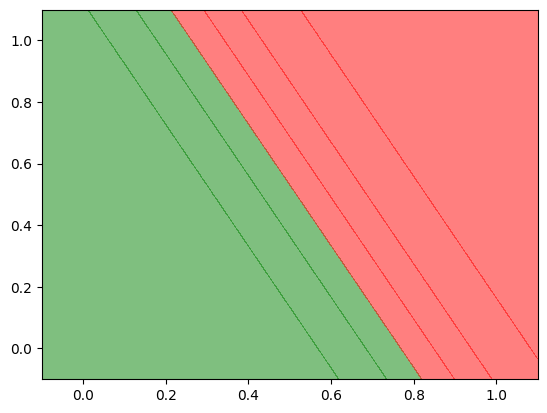

In [17]:
vx = np.arange(-0.1, 1.1, 0.025)
vy = np.arange(-0.1, 1.1, 0.025)
X1, X2 = np.meshgrid(vx,vy)

y_pred_mesh =  classifier.predict(np.array([X1.ravel(),X2.ravel()]).T ).reshape(X1.shape)

from matplotlib.colors import ListedColormap
plt.contourf(X1,X2, y_pred_mesh, alpha  = 0.5, cmap = ListedColormap(('green','red')))

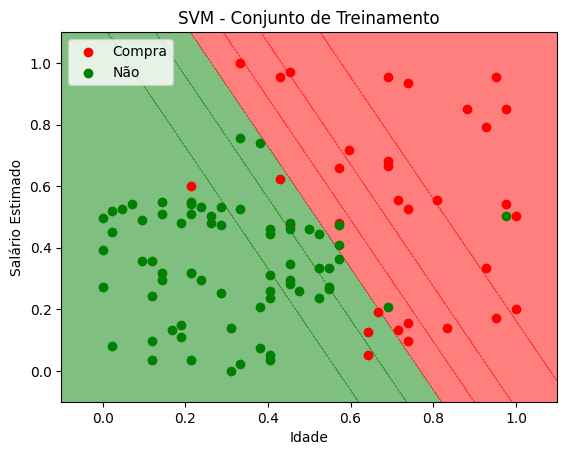

In [18]:
age_neg = X_test[y_test == 0, 0]
salary_neg = X_test[y_test == 0, 1]
age_pos = X_test[y_test == 1, 0]
salary_pos = X_test[y_test == 1, 1]

plt.contourf(X1,X2, y_pred_mesh, alpha  = 0.5, cmap = ListedColormap(('green','red')))

plt.scatter(age_pos,salary_pos, color='red', label = 'Compra')
plt.scatter(age_neg,salary_neg, color='green', label = 'Não')

plt.title('SVM - Conjunto de Treinamento')
plt.xlabel('Idade')
plt.ylabel('Salário Estimado')
plt.legend()
plt.show()

In [19]:
y_pred_mesh[30:35,40:45]

array([[0.965011  , 0.97092324, 0.97586143, 0.97997826, 0.9834049 ],
       [0.9681346 , 0.97353345, 0.9780384 , 0.98179084, 0.98491204],
       [0.9709877 , 0.9759152 , 0.980023  , 0.9834421 , 0.98628426],
       [0.9735923 , 0.9780874 , 0.98183167, 0.984946  , 0.9875332 ],
       [0.97596884, 0.98006773, 0.9834793 , 0.98631513, 0.9886698 ]],
      dtype=float32)